# Image classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
import keras
import warnings 
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# 10,000 images
# 50,000 samples---50,000 arrays each of 3 dimensions
# each sample is a 32 x 32 pixels image
# 3 --RGB channels

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Visualizing Data

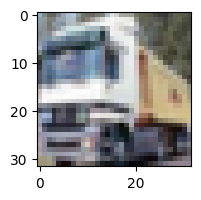

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])
plt.show()
#This function is used to display images or 2D arrays as a graphical representation.

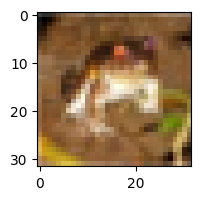

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])
plt.show()

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
y_train[9]

3

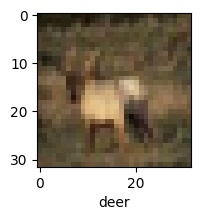

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train,y_train,3)

In [11]:
def get_ten_random_images():
    
    #function returns a dictionary of <label, idx> where idx is the random datapoint of class 'label'
    d = {}
    while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx] not in d.keys():
            d[y_train[idx]] = idx
    return d

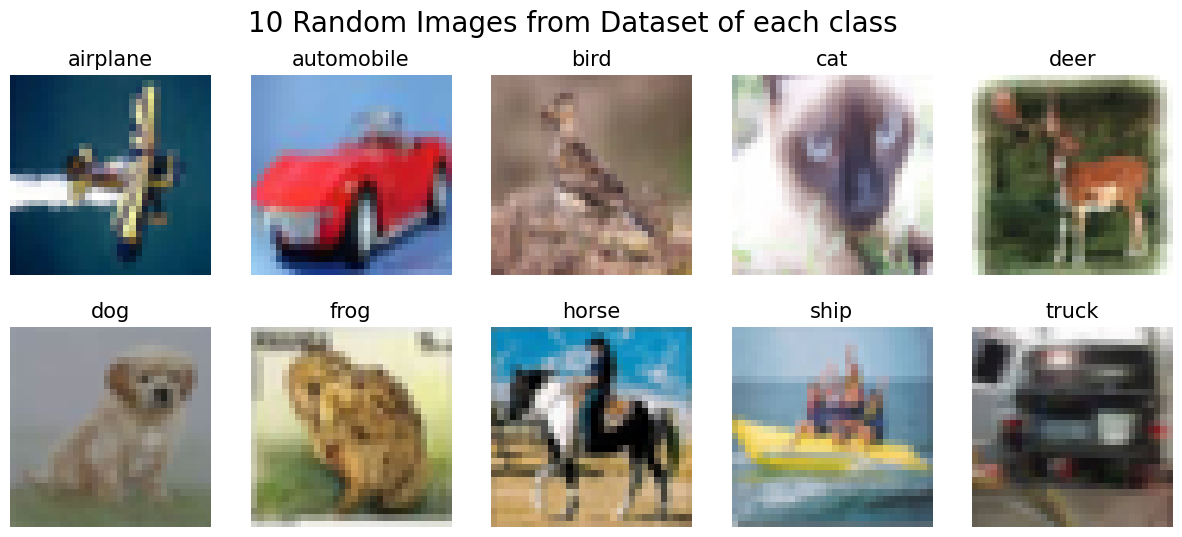

In [12]:
d = get_ten_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(classes[i-1], fontsize=15)
plt.suptitle("10 Random Images from Dataset of each class",fontsize = 20)
plt.show()

### Data Modelling

#### Normalize the data
- whenever you have an image, you want to divide each pixel value by 255.
- pixel value ranges from 0 to 255 for each of the channel.
- it will be normalized to be in between 0 and 1

In [13]:
X_train = X_train/255
X_test = X_test/255

### Model Training

### Building a ANN

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")])
ann.compile(optimizer='SGD',loss="sparse_categorical_crossentropy", metrics=["accuracy"])
ann.fit(X_train,y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 88s 53ms/step - loss: 1.8087 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6215 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.5393 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4803 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4305 - accuracy: 0.4966


#### Accuracy is around 49% at the end of 5 epochs

In [15]:
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      1000
           1       0.51      0.71      0.60      1000
           2       0.35      0.45      0.39      1000
           3       0.36      0.18      0.24      1000
           4       0.49      0.31      0.38      1000
           5       0.33      0.49      0.40      1000
           6       0.59      0.42      0.49      1000
           7       0.62      0.45      0.53      1000
           8       0.53      0.71      0.60      1000
           9       0.56      0.48      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



## Building a CNN

In [46]:
type(X_train[1][2][3][2]), type(X_test[1][2][3][2])

(numpy.float64, numpy.float64)

In [47]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [48]:
## Mean shifting and variance centering
mean = np.mean(X_train, axis=(0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))

In [49]:
X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)

In [50]:
## Converting target variable into categorical matrix
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [52]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

#### Model Building

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers

In [56]:
weight_decay = 1e-4

In [57]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                     

In [62]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=lr_schedule),
    metrics=['accuracy']
)

In [63]:
epochs_hist = model.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50
625/625 [==============================] - 129s 197ms/step - loss: 1.8508 - accuracy: 0.4525 - val_loss: 1.2378 - val_accuracy: 0.5953
Epoch 2/50
625/625 [==============================] - 123s 196ms/step - loss: 1.1590 - accuracy: 0.6338 - val_loss: 1.0774 - val_accuracy: 0.6609
Epoch 3/50
625/625 [==============================] - 122s 194ms/step - loss: 0.9676 - accuracy: 0.6928 - val_loss: 0.8466 - val_accuracy: 0.7336
Epoch 4/50
625/625 [==============================] - 125s 201ms/step - loss: 0.8597 - accuracy: 0.7301 - val_loss: 0.8208 - val_accuracy: 0.7460
Epoch 5/50
625/625 [==============================] - 126s 201ms/step - loss: 0.7850 - accuracy: 0.7577 - val_loss: 0.7507 - val_accuracy: 0.7699
Epoch 6/50
625/625 [==============================] - 123s 197ms/step - loss: 0.7332 - accuracy: 0.7784 - val_loss: 0.7598 - val_accuracy: 0.7777
Epoch 7/50
625/625 [==============================] - 127s 203ms/step - loss: 0.6833 - accuracy: 0.7957 - val_loss: 0.7144 -

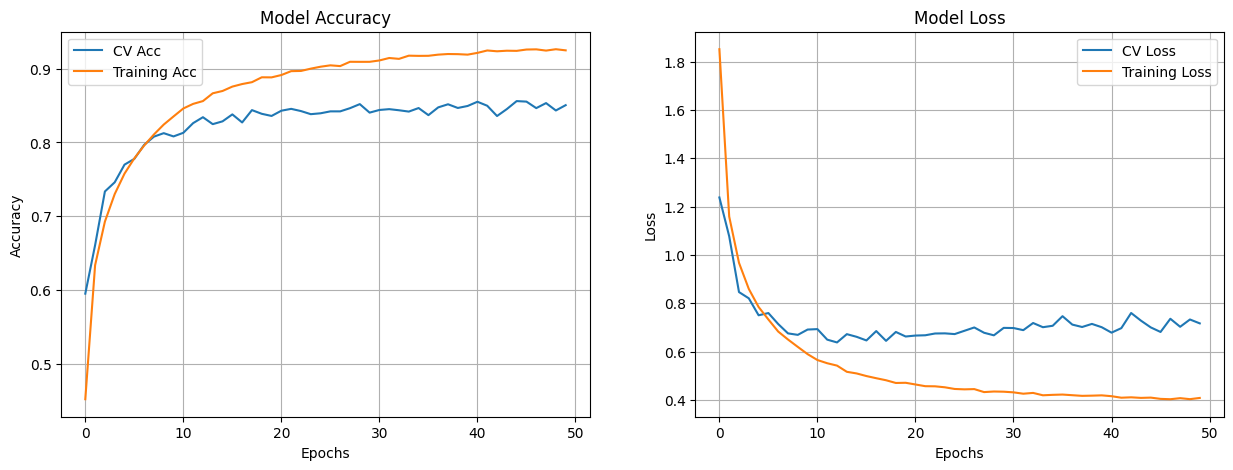

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

#### Model Predictions

In [68]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 12s 36ms/step


array([[4.2550114e-06, 3.8054717e-05, 3.0258998e-06, ..., 8.6653777e-08,
        2.8680863e-05, 4.8215668e-07],
       [9.5544713e-08, 1.7326779e-06, 1.3286542e-15, ..., 1.3801580e-17,
        9.9999809e-01, 2.9093021e-11],
       [1.0808474e-07, 1.9379528e-03, 1.1920601e-09, ..., 1.5067667e-10,
        9.9806184e-01, 5.3695064e-08],
       ...,
       [3.9046472e-10, 1.5611511e-10, 2.5110439e-06, ..., 9.1239177e-05,
        3.3899734e-09, 1.5691111e-08],
       [4.0463946e-04, 9.9927050e-01, 2.4135950e-08, ..., 1.9076575e-05,
        6.6560642e-06, 1.9469708e-06],
       [2.0858920e-12, 9.3141484e-12, 3.9141073e-12, ..., 9.9999988e-01,
        2.4636516e-13, 6.4867859e-13]], dtype=float32)

In [69]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [70]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [71]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

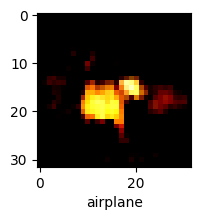

In [72]:
plot_sample(X_test, y_test,3)

#### Model Evaluation

In [66]:
#evaluating using test set
score = model.evaluate(X_test, y_test_cat, batch_size=128, verbose=1)

79/79 [==============================] - 9s 113ms/step - loss: 0.7419 - accuracy: 0.8443


In [67]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 84.43%


With CNN, at the end 5 epochs, accuracy was at around **85%** which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

### Model Saving

In [73]:
model.save('image_classification_CNN.h5')